# Lab 2

by Vsevolod Klyushev

# Task 1

Obtain by simulations the tail of the normalized sum of n i.i.d. Symmetric Bernoulli, as a function of t for 3
different values of n. 

Then plot them along with the theoretical bound on the same tail found in the lecture
notes. 

Is the the derived theoretical bound correct? Is it tight?

According to slide 26, we know, that for $X_1, \dots, X_n$ i.i.d. general Symmetric Bernoulli RVs defined by their PMF $Pr\{X_i=1\}=1-Pr\{X_i=-1\}=p$ the normalized sum is defined as:
$$\cfrac{1}{\sqrt{n}} \sum_{i=1}^{n}\frac{X_i-\mathbb{E}[X_i]}{\sigma} = \cfrac{1}{\sqrt{n}} \sum_{i=1}^{n}\frac{X_i-2p+1}{\sqrt{4p(1-p)}}=\frac{(\frac{1}{\sqrt{n}} \sum_{i=1}^{n}X_i)-\sqrt{n} (2p-1)}{\sqrt{4p(1-p)}}$$
since $\mathbb{E}[X_i]=2p-1$ and $\sigma^2=4p(1-p)$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def get_SB_normalized_sum(n, p=0.5):
    xs = np.random.choice(a=[-1, 1], size=n, p=[1-p, p])
    return (np.sum(xs)/np.sqrt(n) - np.sqrt(n) * (2*p - 1)) / (np.sqrt(4*p*(1-p)))

def get_theoretical_bound(t):
    return np.exp(-(t**2)/2)

def get_simulation_results(sums, t):
    return np.sum([float(val > t) for val in sums]) / len(sums)

In [4]:
get_simulation_results([get_SB_normalized_sum(10) for _ in range(1000)], 1)

np.float64(0.177)

In [5]:
def test_for_SB_with_ns(ns, ts, N=10000, need_yscale=True):
    results = {}
    for n in ns:
        sums = [get_SB_normalized_sum(n) for _ in range(N)]
        results[n] = [get_simulation_results(sums=sums, t=t) for t in ts]

    theoretical = [get_theoretical_bound(t) for t in ts]
    
    plt.figure(figsize=(16, 9))
    plt.title("Comparison for different n")
    plt.plot(ts, theoretical, label="Theoretical bound")
    for n in ns:
        plt.plot(ts, results[n], label=f"Simulation for n={n}")
    
    if need_yscale:
        plt.yscale("log")
    plt.xlabel("t")
    plt.ylabel(r"$Pr\{Z > t\}$")
    plt.legend()
    plt.grid()
    plt.show()

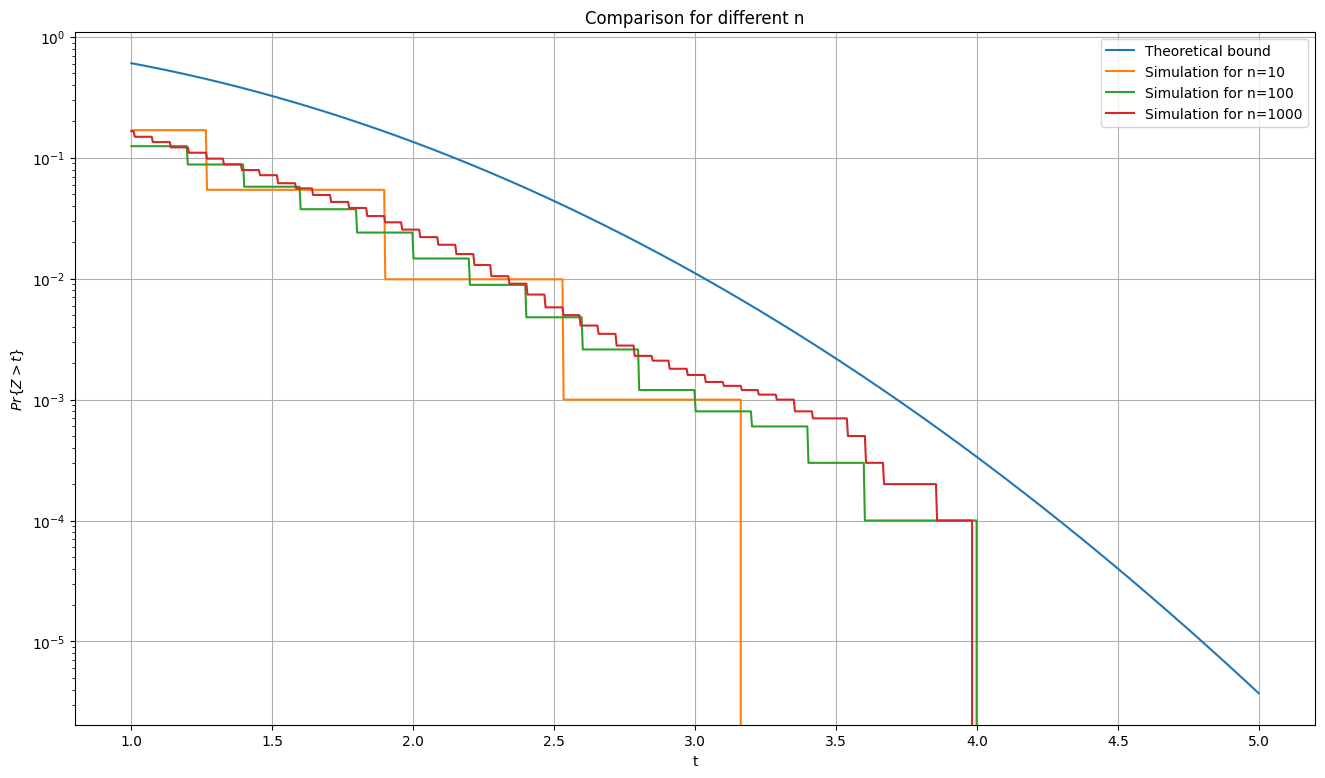

In [6]:
test_for_SB_with_ns([10,100,1000], np.linspace(1, 5, 1000))

Theoretical bound is correct and pretty tight

# Task 2

Obtain by simulations the tail of the normalized sum of n i.i.d. general Symmetric Bernoulli, as a function
of t for 3 different values of p and fixed n. 

Then plot them along with the theoretical bound on the same tail
found in the lecture notes. 

Is the the derived theoretical bound correct? Is it tight?


In [6]:
def test_for_SB_with_ps(ps, n, ts, N=10000, need_yscale=True):
    results = {}
    for p in ps:
        sums = [get_SB_normalized_sum(n, p) for _ in range(N)]
        results[p] = [get_simulation_results(sums=sums, t=t) for t in ts]

    theoretical = [get_theoretical_bound(t) for t in ts]
    
    plt.figure(figsize=(16, 9))
    plt.title("Comparison for different ps")
    plt.plot(ts, theoretical, label="Theoretical bound")
    for p in ps:
        plt.plot(ts, results[p], label=f"Simulation for p={p}")
    
    if need_yscale:
        plt.yscale("log")
    plt.xlabel("t")
    plt.ylabel(r"$Pr\{Z > t\}$")
    plt.legend()
    plt.grid()
    plt.show()

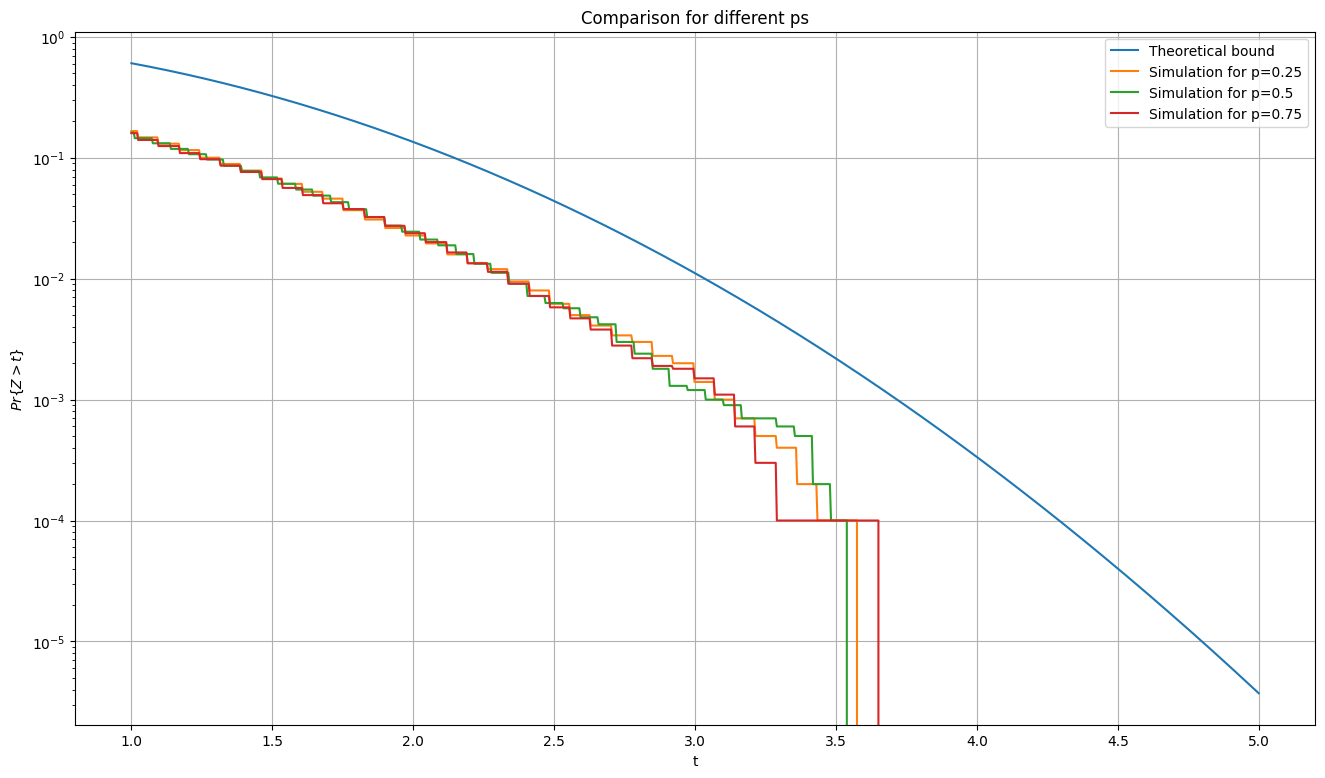

In [7]:
test_for_SB_with_ps([0.25, 0.5, 0.75], 1000, np.linspace(1, 5, 1000))

Theoretical bound is correct and pretty tight

# Task 3

For the classical mean estimator from n samples find via simulations its mean as a function of n and plot it
along with the theoretical. 

Then, for the median means estimator from n samples find via simulations its mean
and plot it on the same figure. 

Generate 3 such figures each for different and increasing n.

In [8]:
import itertools as it
import math

In [9]:
def generate_values(mean, std, n):
    return np.random.normal(mean, std, n)

def median(data):
    data = sorted(data)
    n = len(data)
    if n % 2 == 1:
        return data[n // 2]
    else:
        i = n // 2
        return (data[i - 1] + data[i]) / 2

def median_of_means(xs, k):
    parts = [i for i in it.batched(xs, math.ceil(len(xs) / k))]
    means = [sum(part)/len(part) for part in parts]
    return median(means)


In [10]:
def plot_means_comparison(mean, std, n, N, ks):
    xs = [generate_values(mean, std, n) for _ in range(N)]
    classic = sum([sum(vals)/len(vals) for vals in xs]) / N
    median_of_means_for_ks = [sum([median_of_means(vals, k) for vals in xs])/N for k in ks]
    classic_for_ks = [classic for _ in ks]
    real_for_ks = [mean for _ in ks]

    plt.figure(figsize=(16, 9))
    plt.title(f"Simulation of mean for n={n}: Real mean vs Classical estimator vs Median of Mean estimator")
    plt.plot(ks, real_for_ks, label="Real mean")
    plt.plot(ks, classic_for_ks, label="Classical estimator")
    plt.plot(ks, median_of_means_for_ks, label="Median of Mean estimator")
    
    plt.xlabel("k")
    plt.ylabel("mean value")
    plt.legend()
    plt.grid()
    plt.show()

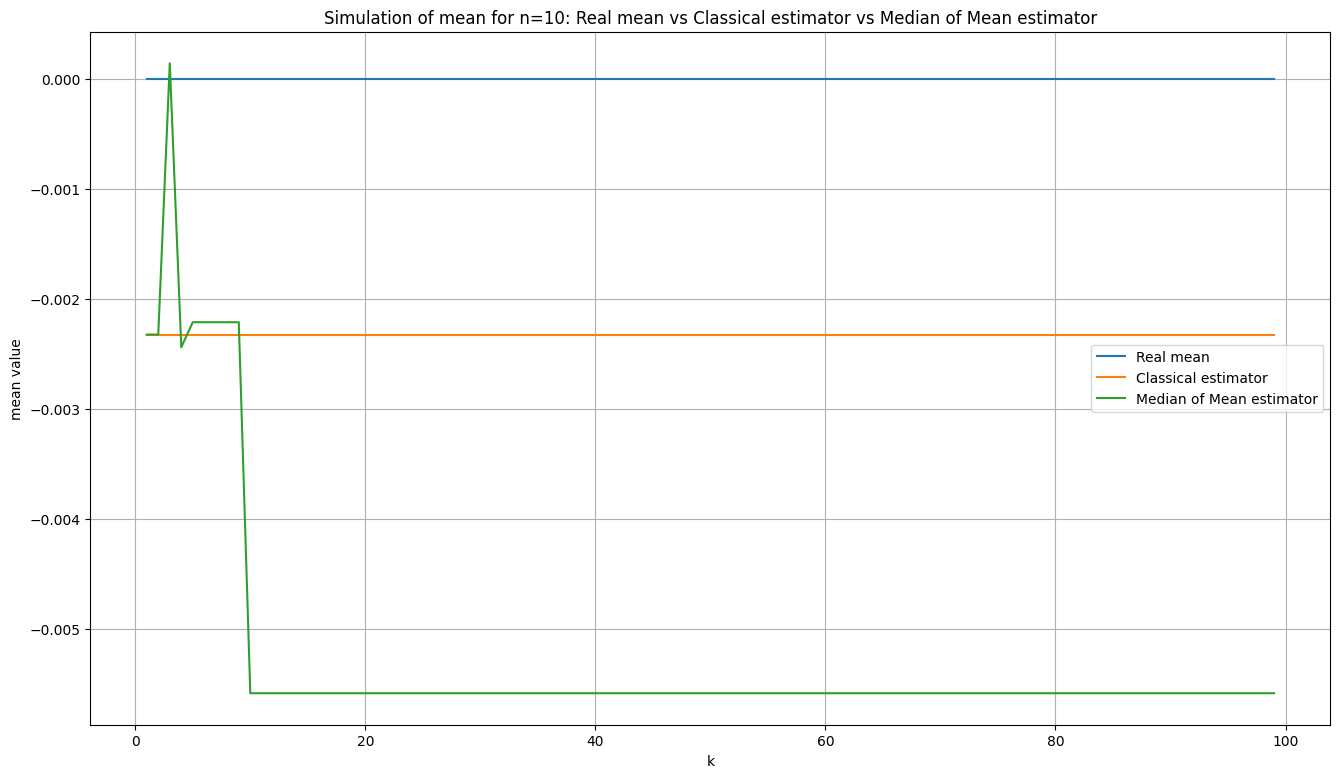

In [11]:
plot_means_comparison(0, 1, 10, 10000, np.arange(1, 100))

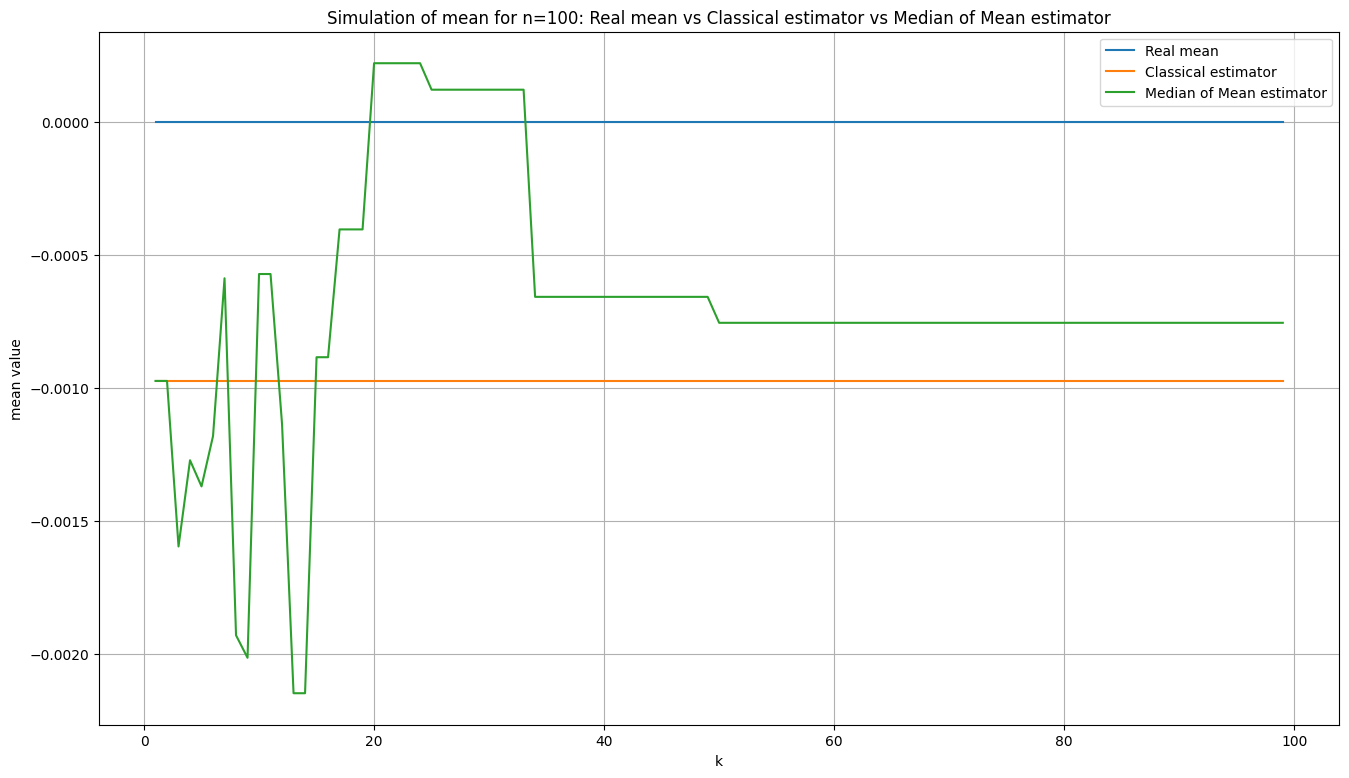

In [12]:
plot_means_comparison(0, 1, 100, 10000, np.arange(1, 100))

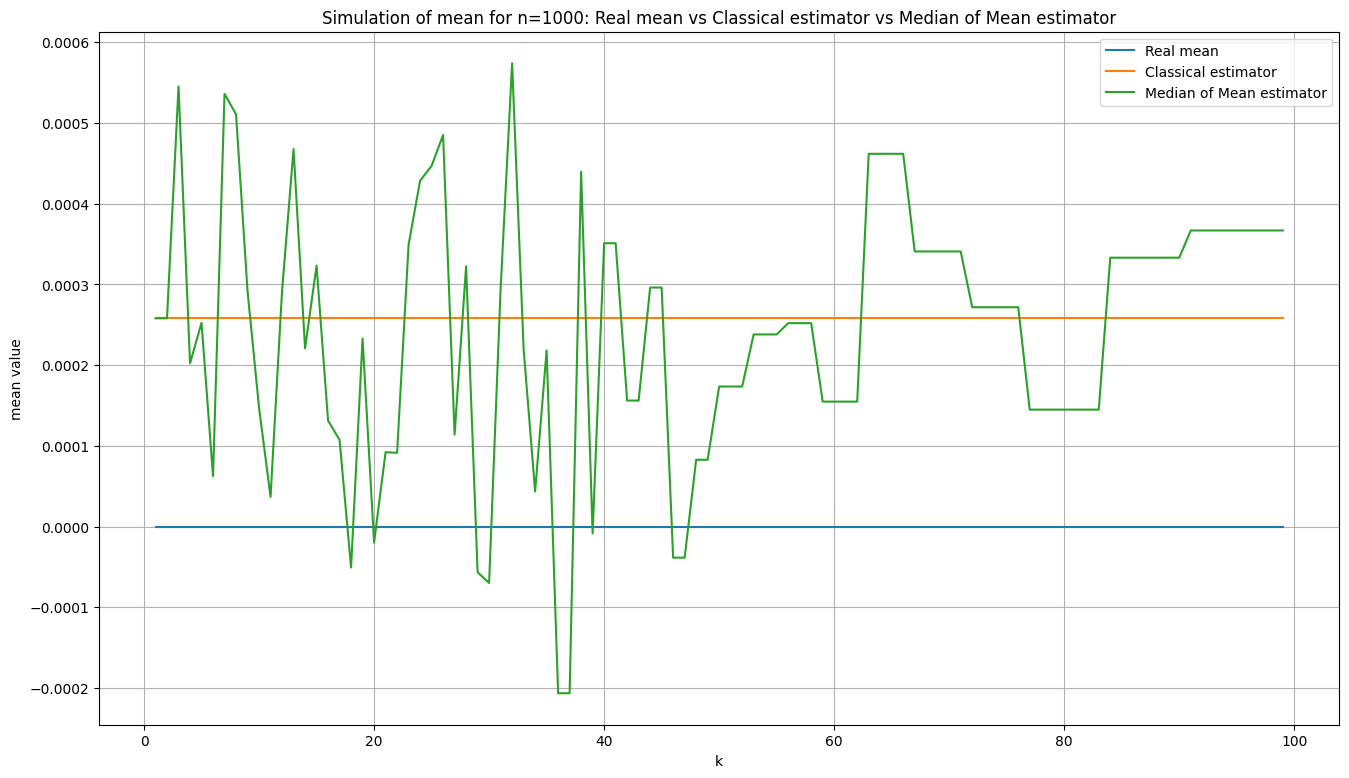

In [13]:
plot_means_comparison(0, 1, 1000, 10000, np.arange(1, 100))

# Task 4

For the classical mean estimator from n samples find via simulations its variance as a function of n and plot
it along with the theoretical. 

Then, for the median means estimator from n samples find via simulations its
variance as a function of n and plot it on the same figure. 

Generate 3 such figures each for different and
increasing n.

Let's recall, that we can calculate variance:
$$Var(X)=\mathbb{E}(X^2)-\mathbb{E}(X)^2$$

In [21]:
def plot_vars_comparison(mean, std, n, N, ks):
    xs = [generate_values(mean, std, n) for _ in range(N)]
    classic_var = sum([sum(vals**2)/len(vals) - (sum(vals)/len(vals))**2 for vals in xs]) / N
    median_of_means_for_ks = [sum([median_of_means(vals**2, k) - median_of_means(vals, k)**2 for vals in xs])/N  for k in ks]
    classic_for_ks = [classic_var for _ in ks]
    real_for_ks = [std**2 for _ in ks]

    plt.figure(figsize=(16, 9))
    plt.title(f"Simulation of variance for n={n}: Real mean vs Classical estimator vs Median of Mean estimator")
    plt.plot(ks, real_for_ks, label="Real variance")
    plt.plot(ks, classic_for_ks, label="Classical estimator")
    plt.plot(ks, median_of_means_for_ks, label="Median of Mean estimator")
    
    plt.xlabel("k")
    plt.ylabel("variance value")
    plt.legend()
    plt.grid()
    plt.show()

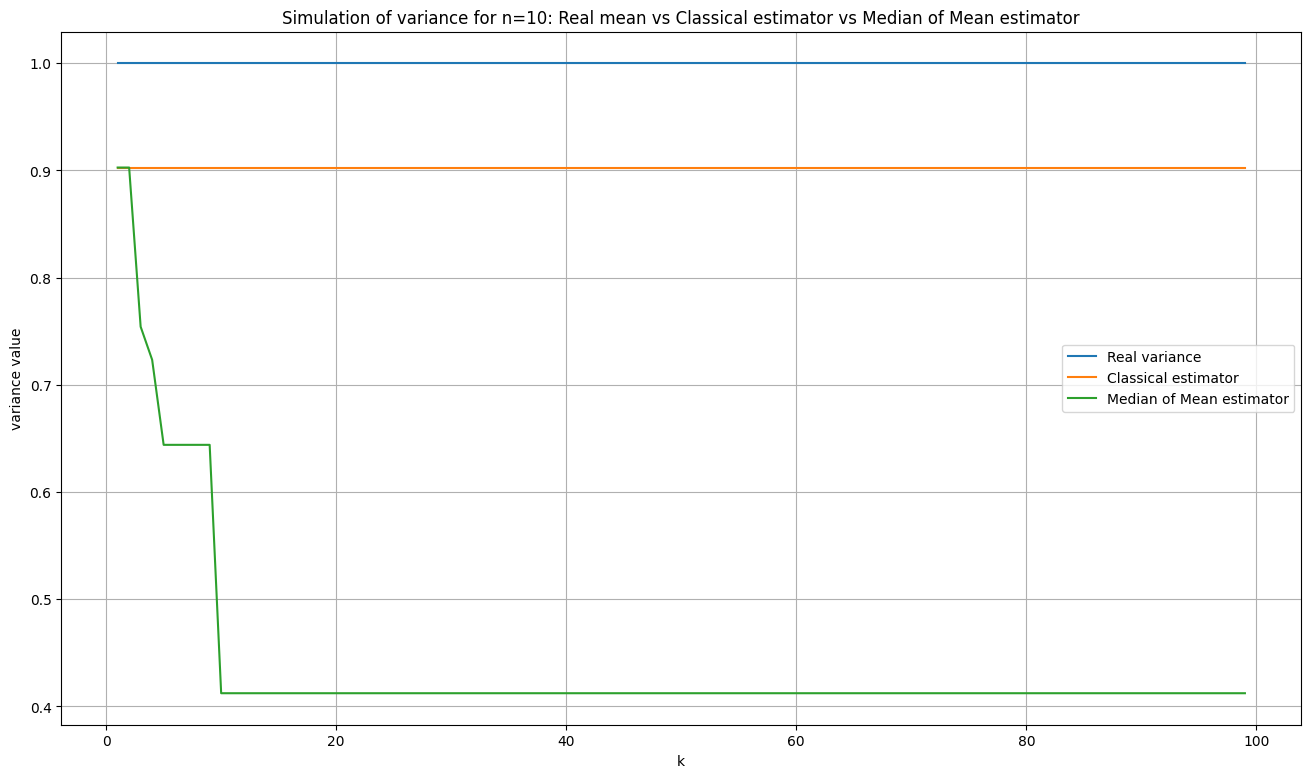

In [22]:
plot_vars_comparison(0, 1, 10, 10000, np.arange(1, 100))

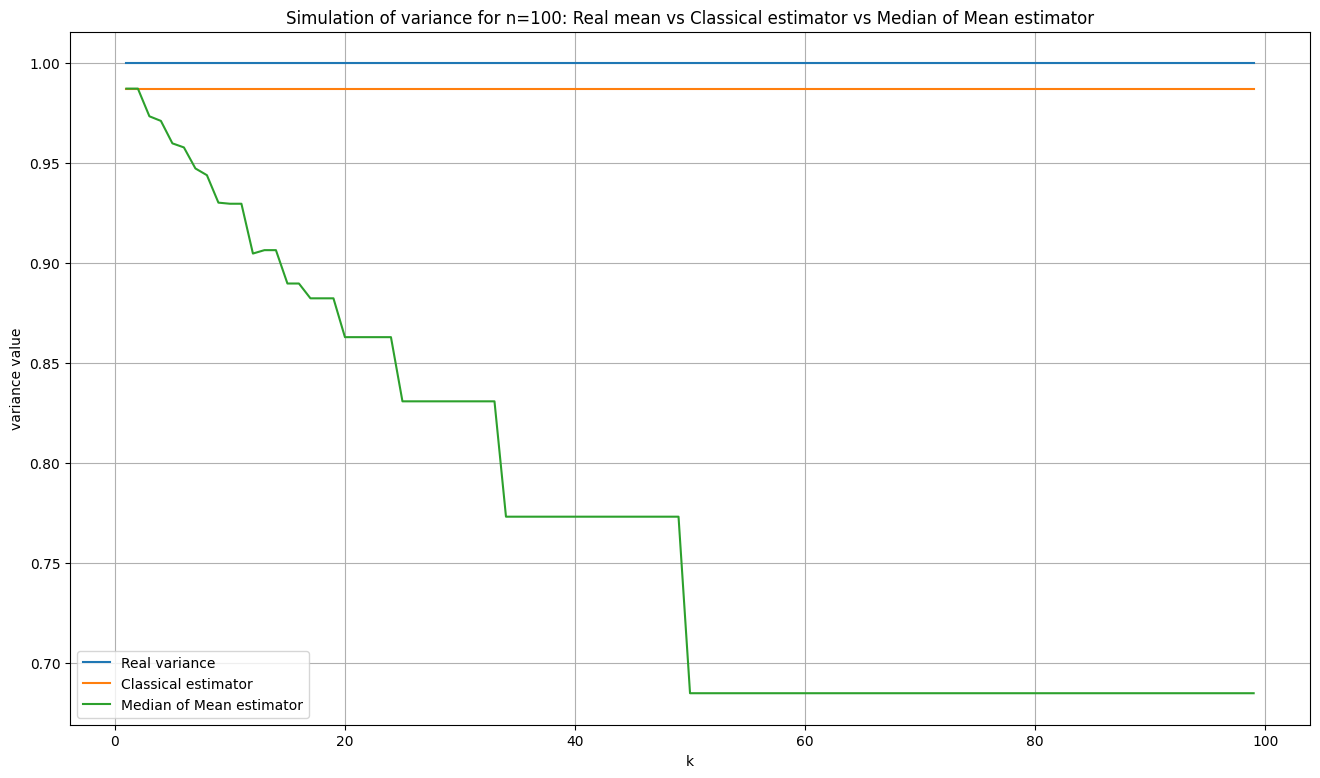

In [23]:
plot_vars_comparison(0, 1, 100, 10000, np.arange(1, 100))

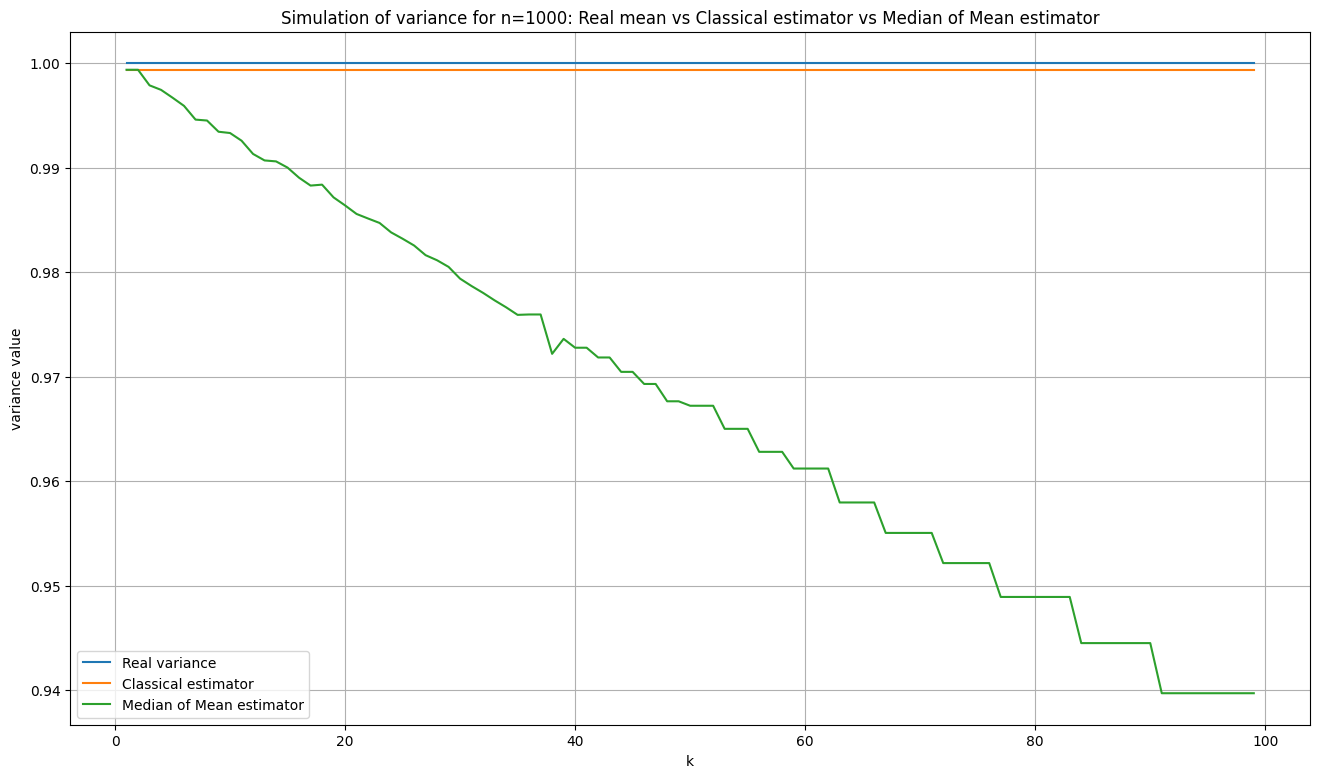

In [24]:
plot_vars_comparison(0, 1, 1000, 10000, np.arange(1, 100))

# Task 5

For the classical mean estimator from n samples find via simulations its distribution and plot it. 

Then, for the
median means estimator from n samples find via simulations its distribution and plot it on the same figure.

Generate 3 such figures each for different and increasing n.

So, from tasks 4 and 5 we know how to get mean and variance, so we need just to put in normal distribution pdf.

In [25]:
def normal_pdf(mean, var, x):
    return 1/np.sqrt(2 * np.pi * var) * np.exp(-(x-mean)**2/(2*var))


def plot_distribution_comparison(mean, std, n, N, ks, xs_for_plot):
    xs = [generate_values(mean, std, n) for _ in range(N)]

    classic_mean = sum([sum(vals)/len(vals) for vals in xs]) / N
    classic_var = sum([sum(vals**2)/len(vals) - (sum(vals)/len(vals))**2 for vals in xs]) / N 

    median_of_means_for_ks_mean = [sum([median_of_means(vals, k) for vals in xs])/N for k in ks]
    median_of_means_for_ks_var = [sum([median_of_means(vals**2, k) - median_of_means(vals, k)**2 for vals in xs])/N  for k in ks]

    plt.figure(figsize=(16, 9))
    plt.title(f"Simulation of distributions for n={n}: Real mean vs Classical estimator vs Median of Mean estimator")

    plt.plot(xs_for_plot, [normal_pdf(mean, std**2, x) for x in xs_for_plot], label="Real distribution")
    plt.plot(xs_for_plot, [normal_pdf(classic_mean, classic_var, x) for x in xs_for_plot], label="Classical estimator")

    for i in range(len(ks)):
        plt.plot(xs_for_plot, [normal_pdf(median_of_means_for_ks_mean[i], median_of_means_for_ks_var[i], x) for x in xs_for_plot], label=f"Median of Mean estimator with k={ks[i]}")

    plt.xlabel("x")
    plt.ylabel(r"$F_{\mu, \sigma}(x)$")
    plt.legend()
    plt.grid()
    plt.show()

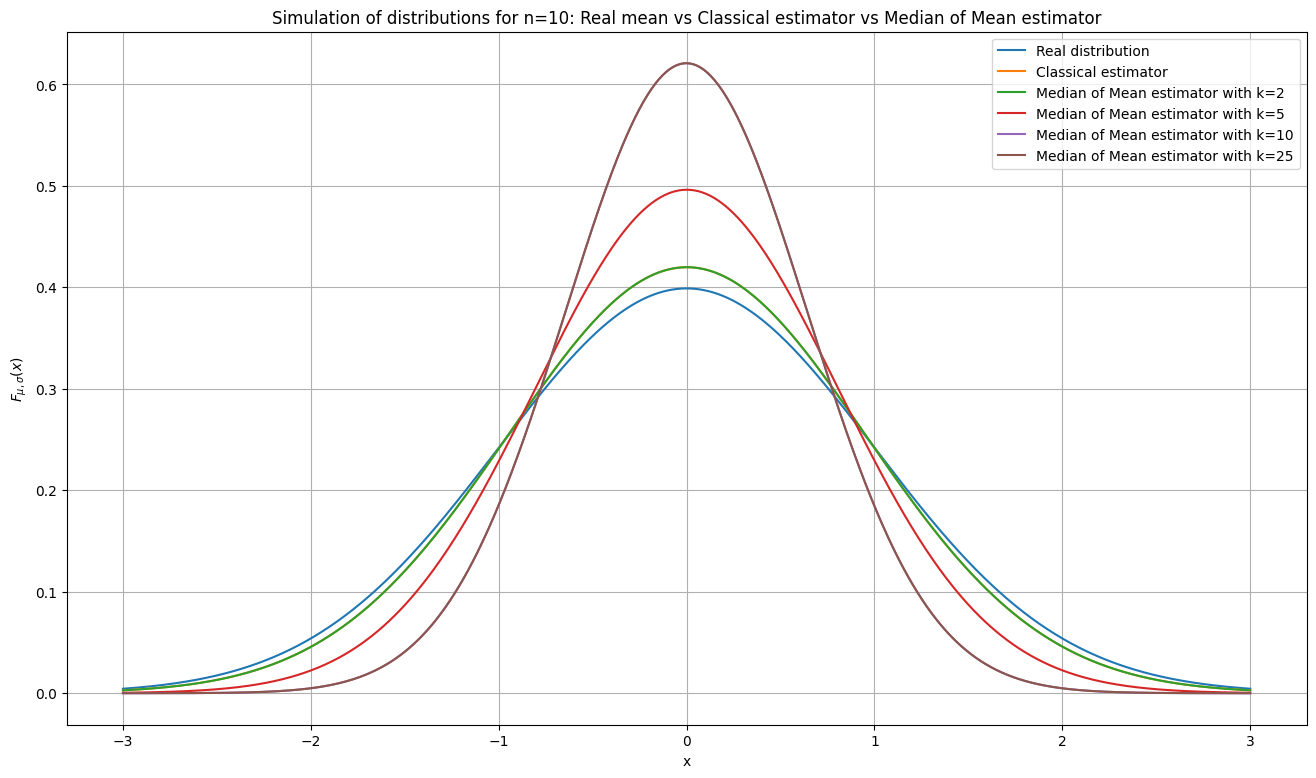

In [26]:
plot_distribution_comparison(0, 1, 10, 10000, [2, 5, 10, 25], np.linspace(-3, 3, 1000))

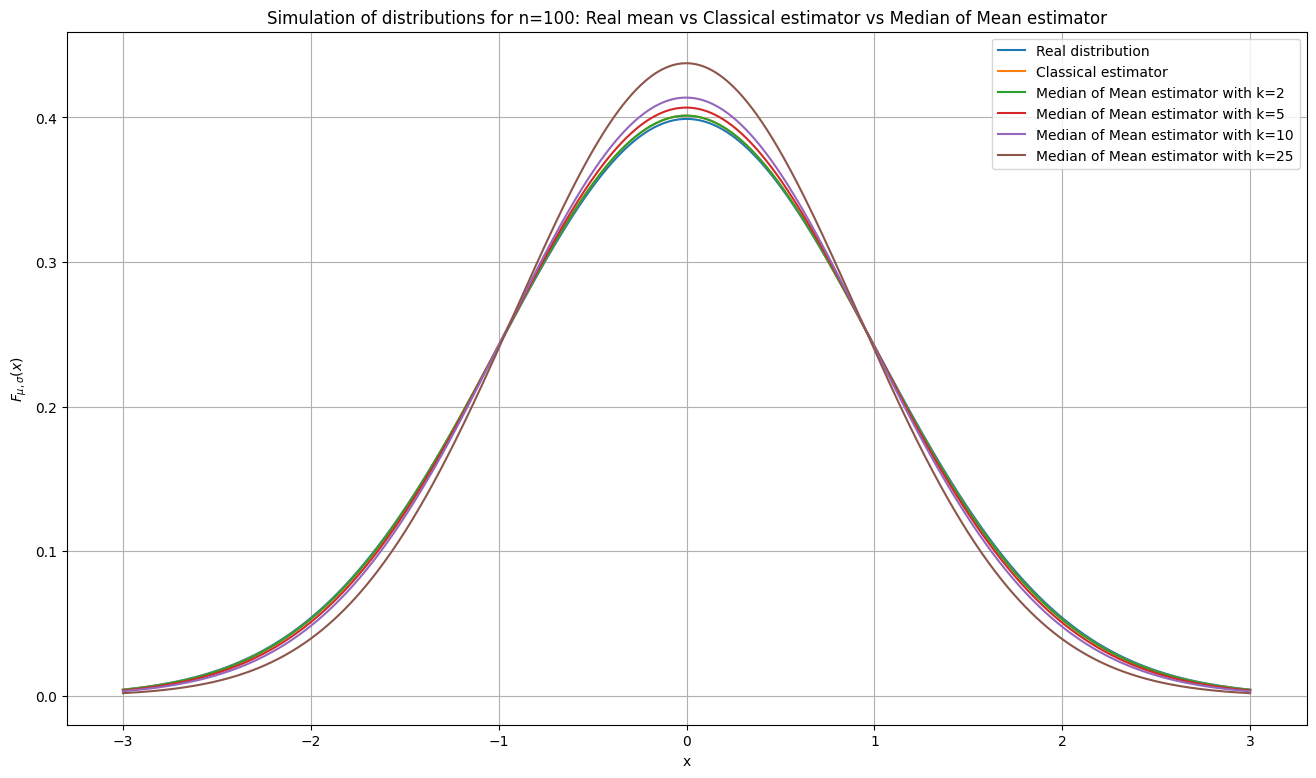

In [27]:
plot_distribution_comparison(0, 1, 100, 10000, [2, 5, 10, 25], np.linspace(-3, 3, 1000))

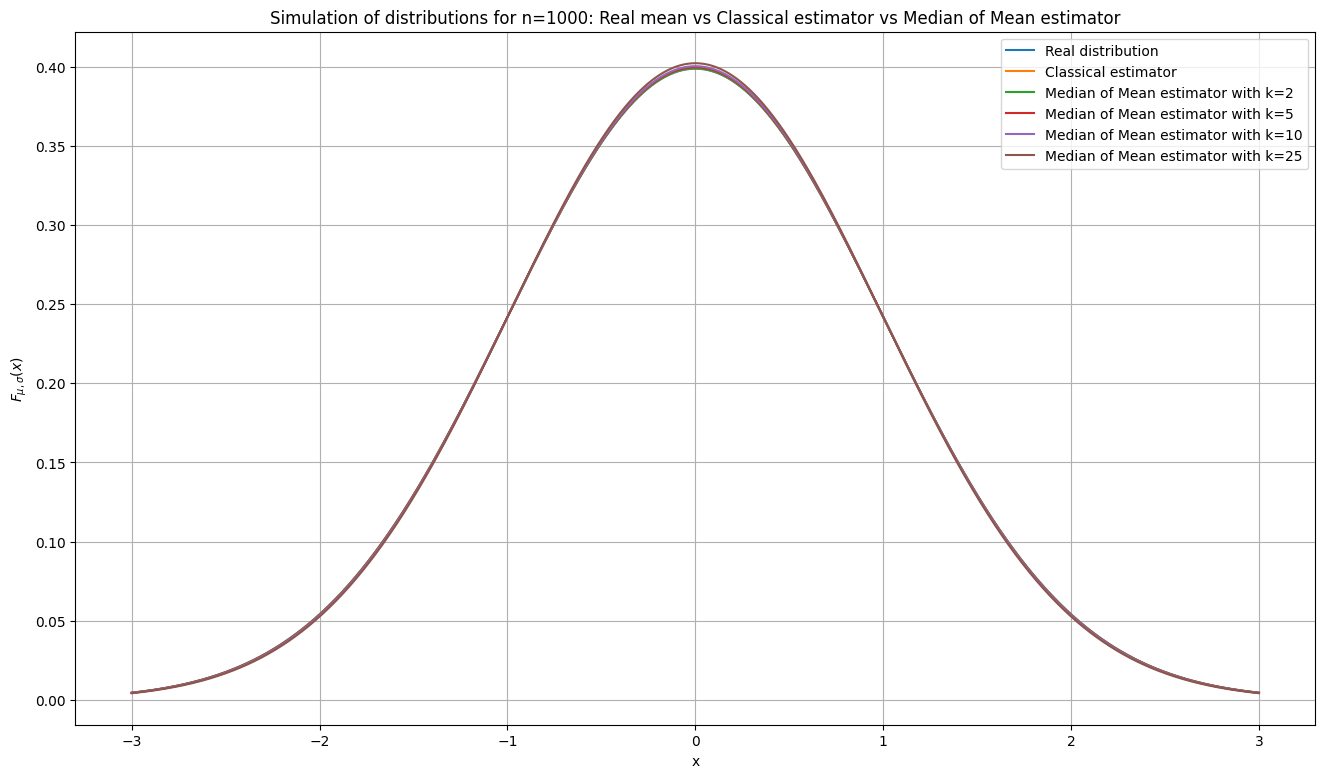

In [28]:
plot_distribution_comparison(0, 1, 1000, 10000, [2, 5, 10, 25], np.linspace(-3, 3, 1000))